<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    sum = 0
    for x, v in zip(X, V):
        sum += np.dot(x, v)
    return list(sum)

def test_sum_prod():
    assert sum_prod([A1, A2], [V1, V2]) == [18, 36]
    assert sum_prod([A2, A3], [V2, V3]) == [21, 39]
    print("Все ок")
A1 = np.array([[1, 2, 3], [4, 5, 6]])
A2 = np.array([[2, 3, 4], [5, 6, 7]])
A3 = np.array([[3, 4, 5], [6, 7, 8]])

V1 = np.array([1, 0, 2])
V2 = np.array([0, 1, 2])
V3 = np.array([2, 1, 0])
test_sum_prod()


Все ок


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [6]:
def binarize(M, threshold=0.5):
    # Your code goes here
    return np.where(M > 0.5, 1, 0)
matrix1 = np.random.rand(5, 6)
np.array_equal
binarize(matrix1)

array([[0, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1]])

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [67]:
np.random.seed(42)
matrix = np.random.randint(1, 5, size=(2, 3))

def unique_rows(mat):
    # Your code goes here
    res = [list(np.unique(mat[i])) for i in range(mat.shape[0])]
    return res



def unique_columns(mat):
    # Your code goes here
    res = [list(np.unique(np.transpose(mat)[i])) for i in range(mat.shape[1])]
    return res

res_row = unique_rows(matrix)
print(matrix, '\n\n', res_row)


[[3 4 1]
 [3 3 4]] 

 [[1, 3, 4], [3, 4]]


In [68]:
res_col = unique_columns(matrix)
print(matrix, '\n\n', res_col)

[[3 4 1]
 [3 3 4]] 

 [[3], [3, 4], [1, 4]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

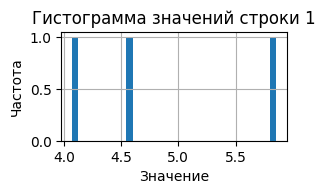

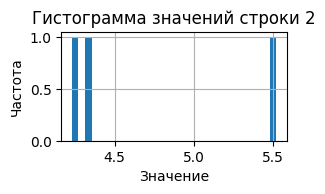

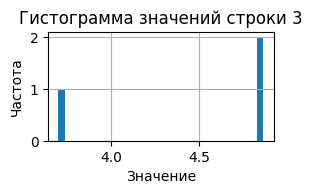

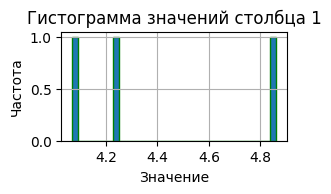

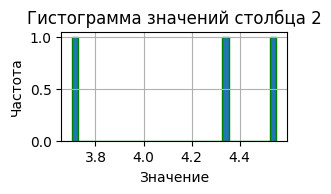

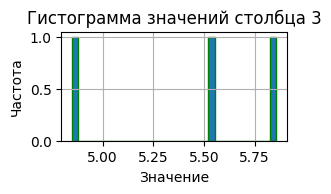

Матожидание по строкам
Строка 1: 4.82584254461134
Строка 2: 4.694025764906472
Строка 3: 4.469829910776972
Дисперсия по строкам
Строка 1: 0.5722309243534104
Строка 2: 0.3455636388741315
Строка 3: 0.296035003928194
Матожидание по столбцам
Строка 1: 4.385526165475393
Строка 2: 4.194832851885081
Строка 3: 5.409339202934312
Дисперсия по столбцам
Строка 1: 0.11802753771235275
Строка 2: 0.13050609734239094
Строка 3: 0.17689649463848298


In [4]:
# Your code goes here
def process_matrix(m, n, mu, sigma):
    # np.random.seed(43)
    matrix = np.random.normal(loc=mu, scale=sigma, size=(m, n))
    # print(matrix)
    rows_mean = np.mean(matrix, axis=1)
    rows_variance = np.var(matrix, axis=1)

    cols_mean = np.mean(matrix, axis=0)
    cols_variance= np.var(matrix, axis=0)

    for i in range(m):
        plt.subplot(m, 2, 2*i+1)
        plt.hist(matrix[i, :], bins=30)
        plt.title(f"Гистограмма значений строки {i+1}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.show()
    print()
    for j in range(n):
        plt.subplot(n, 2, 2*j+2)
        plt.hist(matrix[:, j], ec="green", bins=30)
        plt.title(f"Гистограмма значений столбца {j+1}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.show()
    print("Матожидание по строкам")
    for i in range(m):
        print(f"Строка {i+1}: {rows_mean[i]}")

    print("Дисперсия по строкам")
    for i in range(m):
        print(f"Строка {i+1}: {rows_variance[i]}")

    print("Матожидание по столбцам")
    for i in range(n):
        print(f"Строка {i+1}: {cols_mean[i]}")

    print("Дисперсия по столбцам")
    for i in range(n):
        print(f"Строка {i+1}: {cols_variance[i]}")

process_matrix(m=3, n=3, mu=5, sigma=1)
    

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [7]:
def chess(m, n, a=0, b=0):
    # Your code goes here
    matr = np.ones((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i+j+1)%2==0:
                matr[i, j]=b
            else:
                matr[i, j]=a
    return matr
print(chess(6, 8, a=17, b=13))

[[17 13 17 13 17 13 17 13]
 [13 17 13 17 13 17 13 17]
 [17 13 17 13 17 13 17 13]
 [13 17 13 17 13 17 13 17]
 [17 13 17 13 17 13 17 13]
 [13 17 13 17 13 17 13 17]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

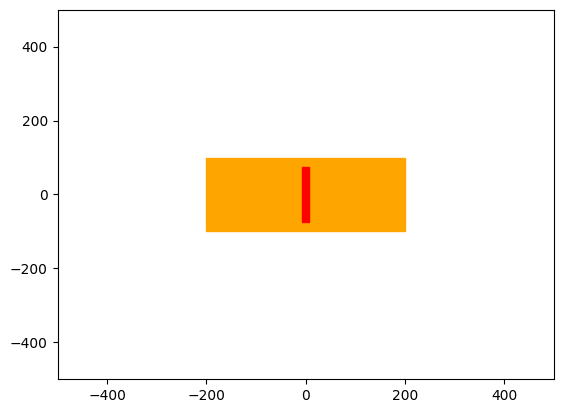

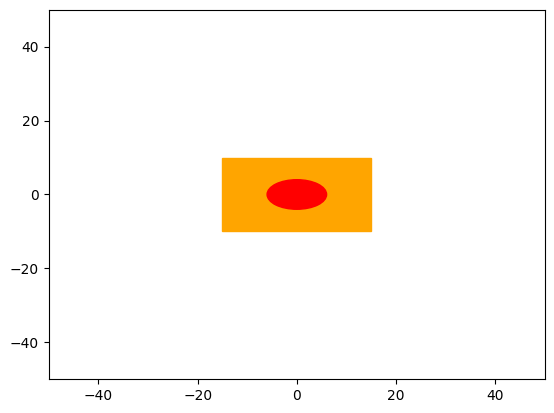

In [16]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Ellipse


def draw_rectangle(a=300, b=20, m=400, n=200, 
                    rectangle_color='pink', background_color='green'):
    # Your code goes here
    fig = plt.figure() 
    ax = fig.add_subplot(111) 

    background = Rectangle((-m//2, -n//2), m, n, color=background_color) 
    rectangle = Rectangle((-a//2, -b//2), a, b, color=rectangle_color) 
    ax.add_patch(background) 
    ax.add_patch(rectangle) 
    plt.xlim([-500, 500]) 
    plt.ylim([-500, 500]) 

    plt.show() 
    
draw_rectangle(15, 150, 400, 200, 
                rectangle_color='#FF0000', background_color='#FFA500')

def draw_ellipse(a, b, m=None, n=None, ellipse_color=None, background_color=None):
    fig = plt.figure() 
    ax = fig.add_subplot(111) 

    background = Rectangle((-m//2, -n//2), m, n, color=background_color) 
    ellipse = Ellipse((0, 0), a, b, color=ellipse_color)
    ax.add_patch(background)
    ax.add_patch(ellipse)
    plt.xlim([-50, 50]) 
    plt.ylim([-50, 50]) 

    plt.show()

draw_ellipse(12, 8, 30, 20, '#FF0000', '#FFA500')

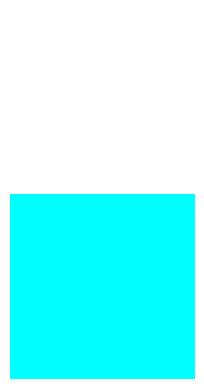

In [11]:
image = np.full((20, 10, 3), (0, 255, 255), dtype=np.uint8)
image[:10, :10] = (255, 255, 255)
plt.imshow(image)
plt.axis('off')
plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [19]:
import pandas as pd

data = {'Дата': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
        'Продажи': [1000, 1200, 1300, 1100, 1400]}

df = pd.DataFrame(data)

df['Дата'] = pd.to_datetime(df['Дата'])

print(df)

        Дата  Продажи
0 2023-01-01     1000
1 2023-02-01     1200
2 2023-03-01     1300
3 2023-04-01     1100
4 2023-05-01     1400


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
# Your code goes here